# Activity 2.2 - Transfer Learning 

**Name:** Tacsay, Marie Emmanuelle
<br> **Section:** CPE32S8
<br> **Instructor:** Engr. Roman Richard

#### Objective(s):

This activity aims to introduce how to apply transfer learning 

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural network 
* Demonstrate how to apply transfer learning in neural network


#### Resources:
* Jupyter Notebook
* CIFAR-10 dataset

#### Procedures
Load the necessary libraries

In [211]:
from __future__ import print_function

import datetime
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Set the parameters

In [212]:
now = datetime.datetime.now
batch_size = 128
num_classes = 10
epochs = 5
img_rows, img_cols = 28, 28
filters = 32
pool_size = 2
kernel_size = 3

Set how the input data is loaded

In [213]:

if K.image_data_format() == 'channels_first':
    input_shape = (1, img_rows, img_cols)
else:
    input_shape = (img_rows, img_cols, 1)

* Write a function to include all the training steps. 
* Use the model, training set, test set and number of classes as function parameters


In [214]:
def train_model(model, train, test, num_classes):
    x_train = train[0].reshape((train[0].shape[0],) + input_shape)
    x_test = test[0].reshape((test[0].shape[0],) + input_shape)
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255
    print('x_train shape:', x_train.shape)
    print(x_train.shape[0], 'train samples')
    print(x_test.shape[0], 'test samples')

    # convert class vectors to binary class matrices
    y_train = keras.utils.to_categorical(train[1], num_classes)
    y_test = keras.utils.to_categorical(test[1], num_classes)

    model.compile(loss='categorical_crossentropy',
                  optimizer='adadelta',
                  metrics=['accuracy'])

    t = now()
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(x_test, y_test))
    print('Training time: %s' % (now() - t))

    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test score:', score[0])
    print('Test accuracy:', score[1])

Shuffle and split the data between train and test sets

In [215]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [216]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Create two datasets 
* one with digits below 5
* one with 5 and above

In [217]:
x_train_lt5 = x_train[y_train < 5]
y_train_lt5 = y_train[y_train < 5]
x_test_lt5 = x_test[y_test < 5]
y_test_lt5 = y_test[y_test < 5]

x_train_gte5 = x_train[y_train >= 5] 
y_train_gte5 = y_train[y_train >= 5]
x_test_gte5 = x_test[y_test >= 5] 
y_test_gte5 = y_test[y_test >= 5]

* Define the feature layers that will used for transfer learning
* Freeze these layers during fine-tuning process

In [218]:
feature_layers = [
    Conv2D(filters, kernel_size,
           padding='valid',
           input_shape=input_shape),
    Activation('relu'),
    Conv2D(filters, kernel_size),
    Activation('relu'),
    MaxPooling2D(pool_size=pool_size),
    Dropout(0.25),
    Flatten(),
]

c:\Users\emtac\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Define the classification layers

In [219]:
classification_layers = [
    Dense(128),
    Activation('relu'),
    Dropout(0.5),
    Dense(num_classes),
    Activation('softmax')
]

Create a model by combining the feature layers and classification layers

In [220]:
model = Sequential(feature_layers + classification_layers)

Check the model summary

In [221]:

model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_34 (Activation)      │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_35 (Activation)      │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_36 (Activation)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_37 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 600,810 (2.29 MB)

 Trainable params: 600,810 (2.29 MB)

 Non-trainable params: 0 (0.00 B)

 Train the  model on the digits 5,6,7,8,9

In [222]:
y_train.max()

9

In [223]:
train_model(model,
            (x_train_gte5, y_train_gte5),
            (x_test_gte5, y_test_gte5), num_classes)

x_train shape: (29404, 28, 28, 1)
29404 train samples
4861 test samples
Epoch 1/5


230/230 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.1213 - loss: 2.2913 - val_accuracy: 0.2911 - val_loss: 2.2542
Epoch 2/5
230/230 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.2087 - loss: 2.2473 - val_accuracy: 0.3931 - val_loss: 2.2005
Epoch 3/5
230/230 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.2832 - loss: 2.1926 - val_accuracy: 0.4411 - val_loss: 2.1312
Epoch 4/5
230/230 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.3207 - loss: 2.1230 - val_accuracy: 0.4806 - val_loss: 2.0405
Epoch 5/5
230/230 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.3487 - loss: 2.0340 - val_accuracy: 0.5104 - val_loss: 1.9284
Training time: 0:00:20.334106
Test score: 1.9283920526504517
Test accuracy: 0.5103887915611267


Freeze only the feature layers

In [224]:

for l in feature_layers:
    l.trainable = False

Check again the summary and observe the parameters from the previous model

In [225]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_34 (Activation)      │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_35 (Activation)      │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_36 (Activation)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_37 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,802,432 (6.88 MB)

 Trainable params: 591,242 (2.26 MB)

 Non-trainable params: 9,568 (37.38 KB)

 Optimizer params: 1,201,622 (4.58 MB)

Train again the model using the 0 to 4 digits

In [226]:
train_model(model,
            (x_train_lt5, y_train_lt5),
            (x_test_lt5, y_test_lt5), num_classes)

x_train shape: (30596, 28, 28, 1)
30596 train samples
5139 test samples
Epoch 1/5
240/240 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 1.5963e-04 - loss: 2.6424 - val_accuracy: 0.0000e+00 - val_loss: 2.5454
Epoch 2/5
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.0013 - loss: 2.5232 - val_accuracy: 0.0000e+00 - val_loss: 2.4274
Epoch 3/5
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.0143 - loss: 2.4063 - val_accuracy: 0.0158 - val_loss: 2.3068
Epoch 4/5
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.1146 - loss: 2.2893 - val_accuracy: 0.5929 - val_loss: 2.1817
Epoch 5/5
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.3520 - loss: 2.1726 - val_accuracy: 0.7984 - val_loss: 2.0694
Training time: 0:00:11.236334
Test score: 2.0691981315612793
Test accuracy: 0.798404335975647


## **Supplementary Activity**
Now write code to reverse this training process. That is, you will train on the digits 0-4, and then finetune only the last layers on the digits 5-9.

In [227]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [228]:
x_train_lt5 = x_train[y_train < 5]
y_train_lt5 = y_train[y_train < 5]
x_test_lt5 = x_test[y_test < 5]
y_test_lt5 = y_test[y_test < 5]

x_train_gte5 = x_train[y_train >= 5] 
y_train_gte5 = y_train[y_train >= 5] 
x_test_gte5 = x_test[y_test >= 5] 
y_test_gte5 = y_test[y_test >= 5] 

In [229]:
now = datetime.datetime.now
batch_size = 128
num_classes = 10
epochs = 5
img_rows, img_cols = 28, 28
filters = 32
pool_size = 2
kernel_size = 3

In [230]:
def train_model(model, train, test, num_classes):
    x_train = train[0].reshape((train[0].shape[0],) + input_shape)
    x_test = test[0].reshape((test[0].shape[0],) + input_shape)
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255
    print('x_train shape:', x_train.shape)
    print(x_train.shape[0], 'train samples')
    print(x_test.shape[0], 'test samples')

    # convert class vectors to binary class matrices
    y_train = keras.utils.to_categorical(train[1], num_classes)
    y_test = keras.utils.to_categorical(test[1], num_classes)

    model.compile(loss='categorical_crossentropy',
                  optimizer='adadelta',
                  metrics=['accuracy'])

    t = now()
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(x_test, y_test))
    print('Training time: %s' % (now() - t))

    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test score:', score[0])
    print('Test accuracy:', score[1])

In [231]:
#unfreeze

for l in feature_layers:
    l.trainable = True
    
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_34 (Activation)      │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_35 (Activation)      │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_36 (Activation)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_37 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,783,296 (6.80 MB)

 Trainable params: 600,810 (2.29 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,182,486 (4.51 MB)

In [232]:
train_model(model,
            (x_train_lt5, y_train_lt5),
            (x_test_lt5, y_test_lt5), num_classes)

x_train shape: (30596, 28, 28, 1)
30596 train samples
5139 test samples
Epoch 1/5


240/240 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.4839 - loss: 2.0733 - val_accuracy: 0.8111 - val_loss: 1.9776
Epoch 2/5
240/240 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.5351 - loss: 1.9832 - val_accuracy: 0.8303 - val_loss: 1.8748
Epoch 3/5
240/240 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.5684 - loss: 1.8838 - val_accuracy: 0.8441 - val_loss: 1.7567
Epoch 4/5
240/240 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.5976 - loss: 1.7651 - val_accuracy: 0.8618 - val_loss: 1.6189
Epoch 5/5
240/240 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.6173 - loss: 1.6395 - val_accuracy: 0.8784 - val_loss: 1.4714
Training time: 0:00:23.547322
Test score: 1.4715803861618042
Test accuracy: 0.8783810138702393


**Analysis:** In this part of the code, the feature_layer was unfrozen in order for the classification of images of 0-4 then the model was fitted using the mentioned data. The test score and accuracy are 1.47% and 87.84%, respectively, which shows that the model together with the feature_layer and classification layer did a good performance in classifying the images.

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


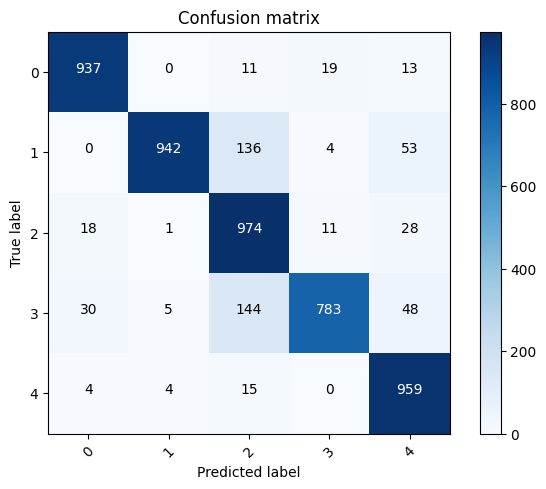

In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(x_test_lt5)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis=1)
# Convert validation observations to one hot vectors
Y_true = y_test_lt5
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(5)) 

**Analysis:** The confusion matrix above shows how the model was able to classify the images that are belong to 0-4 numbers or labels. There are two correctly classified images or labels which is 1s because the model didn't classified them as 0 (0 in value). Also, there are low numbered values which indicates that the model classified most of the images correctly however, there are still images that were inaccurately classified by the model. Overall, the model was able to show a good performance in classifying images based on the test score and test accuracy obtained and was able to prove through the visualization of its performance using confusion matrix.

In [234]:
#freeze

freeze2 = feature_layers[:-1]
for i in freeze2:
    i.trainable = False
    
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_34 (Activation)      │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_35 (Activation)      │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_36 (Activation)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_37 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,802,432 (6.88 MB)

 Trainable params: 591,242 (2.26 MB)

 Non-trainable params: 9,568 (37.38 KB)

 Optimizer params: 1,201,622 (4.58 MB)

In [235]:
x_train_gte5.max()

255

In [236]:
train_model(model,
            (x_train_gte5, y_train_gte5),
            (x_test_gte5, y_test_gte5), num_classes)

x_train shape: (29404, 28, 28, 1)
29404 train samples
4861 test samples
Epoch 1/5
230/230 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 3.2737e-04 - loss: 2.9349 - val_accuracy: 0.0000e+00 - val_loss: 2.7089
Epoch 2/5
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.0069 - loss: 2.6631 - val_accuracy: 0.0000e+00 - val_loss: 2.4160
Epoch 3/5
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.0702 - loss: 2.3781 - val_accuracy: 0.2948 - val_loss: 2.1315
Epoch 4/5
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.2675 - loss: 2.1212 - val_accuracy: 0.7418 - val_loss: 1.9073
Epoch 5/5
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4288 - loss: 1.9227 - val_accuracy: 0.7628 - val_loss: 1.7454
Training time: 0:00:13.071244
Test score: 1.7453651428222656
Test accuracy: 0.7628059983253479


**Analysis:** In this part of code, the feature_layer was frozen except for the last one which will be undergone fine-tuning process. This is the required method for the supplementary part and with this, the classification layer as together with the last layer of the feature_layer, the model achieved a test score and test accuracy of 1.75% and 76.81%, respectively. Also, the data or images that are included or would be undergone the process would be 5-9 or images that are greater than or equal to 5.

152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


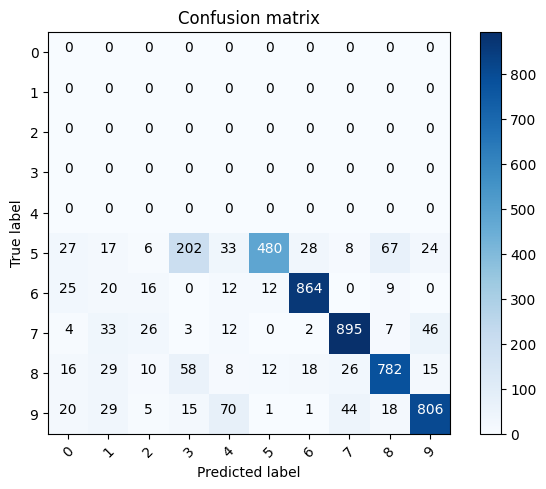

In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(x_test_gte5)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis=1)
# Convert validation observations to one hot vectors
Y_true = y_test_gte5
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

**Analysis:** The confusion matrix above shows the visualization of the classification or performance of the model. In this case, the model is not good enough in classifying the images in which are labeled to numbers 5-9. It is because of the huge values that the model obtained outside of the diagonal boxes in the matrix. This indicates that the model gained a large number of incorrect classification of images (higher one is 202 images in which the model inaccurately classified 0s as 3s). With this, it can be said that the model doesn't perform well because of the large number of images that were inaccurately predicted or classified as well as the test accuracy obtained by the model.

In [238]:
y_test_gte5

array([7, 9, 5, ..., 9, 5, 6], dtype=uint8)

In [239]:
#including all the labels 0-9
x_train_lt10 = x_train[y_train < 10]
y_train_lt10 = y_train[y_train < 10]
x_test_lt10 = x_test[y_test < 10]
y_test_lt10 = y_test[y_test < 10]

In [240]:
now = datetime.datetime.now
batch_size = 128
num_classes = 10
epochs = 10
img_rows, img_cols = 28, 28
filters = 32
pool_size = 2
kernel_size = 3

In [241]:
feature_layers = [
    Conv2D(filters, kernel_size,
           padding='valid',
           input_shape=input_shape),
    Activation('relu'),
    Conv2D(filters, kernel_size),
    Activation('relu'),
    MaxPooling2D(pool_size=pool_size),
    Dropout(0.25),
    Flatten(),
]

c:\Users\emtac\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [242]:
classification_layers = [
    Dense(128),
    Activation('relu'),
    Dropout(0.5),
    Dense(num_classes),
    Activation('softmax')
]

In [243]:
def train_model(model, train, test, num_classes):
    x_train = train[0].reshape((train[0].shape[0],) + input_shape)
    x_test = test[0].reshape((test[0].shape[0],) + input_shape)
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255
    print('x_train shape:', x_train.shape)
    print(x_train.shape[0], 'train samples')
    print(x_test.shape[0], 'test samples')

    # convert class vectors to binary class matrices
    y_train = keras.utils.to_categorical(train[1], num_classes)
    y_test = keras.utils.to_categorical(test[1], num_classes)

    model.compile(loss='categorical_crossentropy',
                  optimizer='adadelta',
                  metrics=['accuracy'])

    t = now()
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(x_test, y_test))
    print('Training time: %s' % (now() - t))

    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test score:', score[0])
    print('Test accuracy:', score[1])

In [244]:
model = Sequential(feature_layers + classification_layers)

In [245]:
#unfreeze

for l in feature_layers:
    l.trainable = True
    
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_38 (Activation)      │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_39 (Activation)      │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_40 (Activation)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_41 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 600,810 (2.29 MB)

 Trainable params: 600,810 (2.29 MB)

 Non-trainable params: 0 (0.00 B)

In [246]:
train_model(model,
            (x_train_lt10, y_train_lt10),
            (x_test_lt10, y_test_lt10), num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.1286 - loss: 2.2946 - val_accuracy: 0.2173 - val_loss: 2.2590
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.1781 - loss: 2.2604 - val_accuracy: 0.3217 - val_loss: 2.2192
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.2417 - loss: 2.2234 - val_accuracy: 0.4676 - val_loss: 2.1713
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.2967 - loss: 2.1786 - val_accuracy: 0.6016 - val_loss: 2.1103
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.3661 - loss: 2.1216 - val_accuracy: 0.6700 - val_loss: 2.0310
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.4345 - loss: 2.0446 - val_accuracy: 0.7082 - val_loss: 1.9290
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.4806 - loss: 1.9540 - val_accuracy: 0.7321 - val_loss: 1.8016
Epoch 8/10
469/469 ━━━━

**Analysis:** In this part of the code, the feature_layer was unfrozen in order for the classification of images of 0-9 then the model was fitted using the mentioned data. The test score and accuracy are 1.33% and 78.65%, respectively, which shows that the model together with the feature_layer and classification layer didn't have a good performance in classifying the images.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


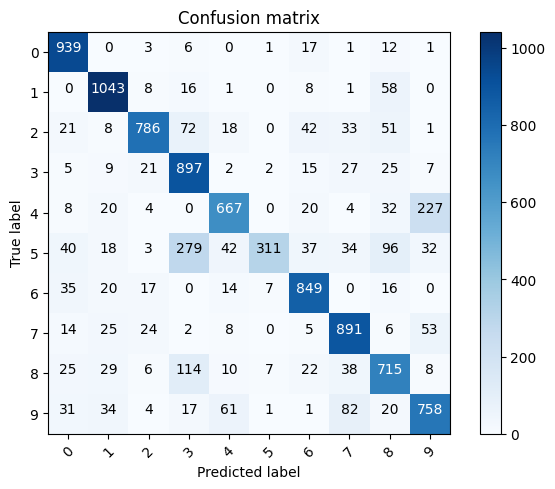

In [247]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(x_test_lt10)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis=1)
# Convert validation observations to one hot vectors
Y_true = y_test_lt10
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

**Analysis:** The confusion matrix above shows how the model was able to classify the images that are belong to 0-9 numbers or labels. There are several correctly classified images or labels because the model didn't classified them as other labels or numbers. Also, there are low numbered values which indicates that the model classified most of the images correctly however, there are still images that were inaccurately classified by the model especially those who have large amount of inaccurate images classified (higher one gained 279 images which the model incorrectly classified 5 as 3). Overall, the model was able to show a poor performance in classifying images based on the test score and test accuracy obtained and was able to prove through the visualization of its performance using confusion matrix.

In [248]:
#freeze

freeze2 = feature_layers[:-1]
for i in freeze2:
    i.trainable = False
    
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_38 (Activation)      │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_39 (Activation)      │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_40 (Activation)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_41 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,802,432 (6.88 MB)

 Trainable params: 591,242 (2.26 MB)

 Non-trainable params: 9,568 (37.38 KB)

 Optimizer params: 1,201,622 (4.58 MB)

In [249]:
train_model(model,
            (x_train_lt10, y_train_lt10),
            (x_test_lt10, y_test_lt10), num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.6070 - loss: 1.4673 - val_accuracy: 0.7951 - val_loss: 1.2606
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.6261 - loss: 1.4093 - val_accuracy: 0.8027 - val_loss: 1.2002
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.6425 - loss: 1.3506 - val_accuracy: 0.8075 - val_loss: 1.1454
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.6577 - loss: 1.3030 - val_accuracy: 0.8136 - val_loss: 1.0961
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.6659 - loss: 1.2640 - val_accuracy: 0.8172 - val_loss: 1.0511
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.6799 - loss: 1.2156 - val_accuracy: 0.8222 - val_loss: 1.0098
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.6901 - loss: 1.1849 - val_accuracy: 0.8248 - val_loss: 0.9724
Epoch 8/10
469/469 ━━━━━

**Analysis:** In this part of code, the feature_layer was frozen except for the last one which will be undergone fine-tuning process. This is the required method for the supplementary part and with this, the classification layer as together with the last layer of the feature_layer, the model achieved a test score and test accuracy of 87.80% and 83.65%, respectively. Also, the data or images that are included or would be undergone the process would be all the labels or images which are labeled to 0s-9s.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


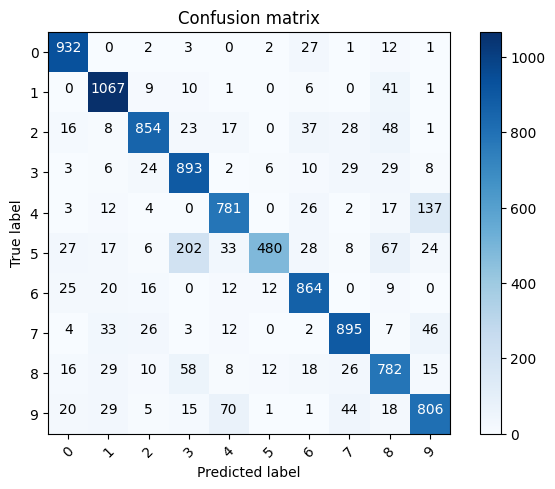

In [250]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(x_test_lt10)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis=1)
# Convert validation observations to one hot vectors
Y_true = y_test_lt10
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

**Analysis:** The confusion matrix above shows the visualization of the classification or performance of the model. In this case, the model is fair enough in classifying the images in which are labeled to numbers 0-9. It is because the majority of the boxes or squares (not included in the diagonal formation) have values or numbers of images. This indicates that the model gained numbers of incorrect classification of images (higher one is 202 images in which the model inaccurately classified 5s as 3s). However, there are 0 values or number of images which means that the model was able to classify these images correctly. With this, it can be said that the model fairly perform because the majority of the matrix have values or images that were inaccurately predicted or classified as well as the test accuracy obtained by the model.

## **Conclusion**

In this activity, we were introduced to the concept of transfer learning wherein this concept would reuse the knowledge of the prior process in order to enhance the classification or prediction process of the model. Using this concept to improve a model's classification ability gives advantages such as it could reduce the training time of the new model, improved the neural network performance and would improved the generalization of data especially in generalizing unseen data because of the learning knowledge from the previous process of used model. Learning this concept would help us to improved the model that we could create as well as it can help us to further understand the concept of deep learning for a better application of the concept. Observing and experimenting the various syntax of the concept would help us to better understand and could improve our skills in creating model. In addition, learning the concept of transfer learning is an advantage for us since it could help us know how to improve the model we will create for this concept is an essential tool in enhancement of model to create an efficient model that would solve a given problem.

**Honor Pledge: “I affirm that I shall not give or receive any unauthorized help on this assignment and that all work is my own.”**

Google Colab Link: https://colab.research.google.com/drive/1O5qjh8FznGNnid168SB7TSRGELrNInyZ?usp=sharing